# Gold Price Prediction

## Author - Yash Bhadiyadra

**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

**Explore the dataset**

In [2]:
dataset = pd.read_csv("gold_price_data.csv") 

In [3]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
dataset.shape

(2290, 6)

Dataset contains 2290 rows and 6 columns.

In [5]:
dataset.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

Date column is of data type object(date) rest column are of float64(numerical) data type.

In [6]:
dataset.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

There are no Null values in given dataset.

In [7]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


We will use **'Correlation'** to find out measure of extent of interdependance between variables.
In python pearson's correlation method is default function of corr().

Pearson's Correlation: It measures the linear dependance between two variables (X and y variables).

Range of resulting coefficient is between -1 to +1.
where,
1.  1 means Perfect positive linear correlation.
2.  0 means No linear correlation as no effect of variables on each other.
3. -1 means Perfect Negative correlation.

In [8]:
correlation = dataset.corr()

In [9]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

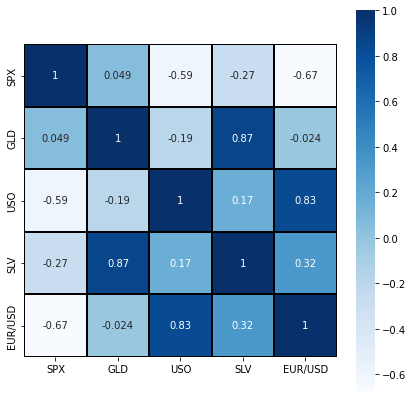

In [10]:
#heatmap to shows a 2D correlation matrix between two variables.

plt.figure(figsize = (7,7))

sns.heatmap(correlation, square='True', cbar=True, annot=True, linewidths='0.2', linecolor='black', cmap='Blues')

Correaltion between Gold (Target variable) and other variables.

In [11]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

Distplot: It is important in visualization case having more than one independant variable.

C:\Users\ACER\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

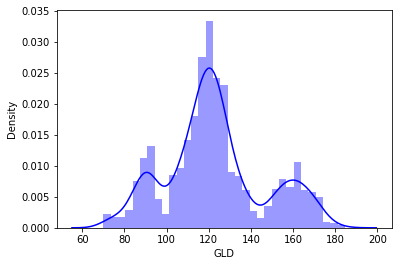

In [12]:
sns.distplot(dataset['GLD'],color='b')

**Prepare the dataset for training**

Data Spliting into X = independent(Features) varibales and y = dependent variables(Label)

In [13]:
X = dataset.drop(['Date','GLD'],axis=1)
y = dataset['GLD']

In [14]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [15]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2) #Training data 80% rest for testing purpose

**Use any prediction algorithm based upon the EDA**

we will use Random Forest Algorithm for Regression.

In [17]:
rfr = RandomForestRegressor()

**Train the model to fit the data**

In [19]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

**Make predictions using the trained model**

In [20]:
y_pred = rfr.predict(x_test)

y_pred

array([168.34569977,  82.02239979, 116.01810033, 127.72150077,
       120.69310126, 154.63029737, 149.83539835, 126.22090002,
       117.42629877, 125.95740082, 116.7300009 , 172.05250108,
       141.86969852, 168.08399825, 115.12869988, 117.88540042,
       136.78460327, 169.93020028, 159.028003  , 160.77489961,
       155.2360003 , 125.01580011, 175.64279963, 157.03430405,
       125.2845004 ,  94.09349947,  76.69300016, 120.48760025,
       119.05229946, 167.58160017,  88.2083009 , 125.22039971,
        91.22210079, 117.72140023, 120.96649916, 136.20290094,
       115.53310124, 115.14370101, 146.62629929, 107.3305011 ,
       104.01530221,  87.39689818, 126.52340018, 117.77850003,
       152.3462987 , 119.55600014, 108.44789978, 108.21059788,
        93.22300073, 127.10359787,  74.76110023, 113.39409939,
       121.39010011, 111.26529888, 118.90999887, 120.9090997 ,
       159.23070033, 167.8251013 , 147.01899685,  85.80709855,
        94.1616003 ,  86.88539879,  90.47420019, 118.99

R-Squared or R^2:
1. it is also called as coefficient of Determination.
2. it determines how close the data is to be fitted line.
3. it is the percentage of variation of target variable(y), that is explained by linear model. 

In [21]:
from sklearn import metrics

metrics.r2_score(y_test,y_pred)

0.989587640126886

It is clear that error is less and model is working good.

In [22]:
accuracy = rfr.score(x_train,y_train)

print(f"we have Training data with {(accuracy * 100).round(2)}% accuracy.")

we have Training data with 99.85% accuracy.


In [23]:
accuracy = rfr.score(x_test,y_test)

print(f"we have Testing data with {(accuracy * 100).round(2)}% accuracy.")

we have Testing data with 98.96% accuracy.


**Visualising the Accuracy**

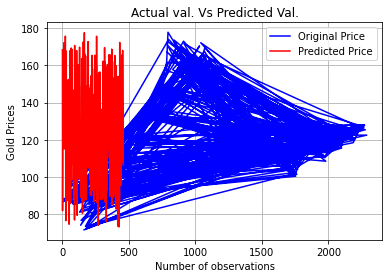

In [30]:
plt.plot(y_test,color="Blue",label="Original Price")

plt.plot(y_pred,color="Red",label="Predicted Price")

plt.title("Actual val. Vs Predicted Val.")

plt.xlabel('Number of observations')

plt.ylabel('Gold Prices')

plt.grid(4.5)
plt.legend()
plt.show()